In [1]:
import numpy as np
import pandas as pd
import os
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import random 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [2]:
# re-size all the images to standard size 224 x 224
IMAGE_SIZE = [224, 224]

# specifying path for train and test data folders
train_path = 'C:/Ajay/documents/Major project/data/train'
valid_path = 'C:/Ajay/documents/Major project/data/test'

In [3]:
#function to visualize image
def plot_image(file, directory=None, sub=False, aspect=None):
    path = directory + file
    
    img = plt.imread(path)
    
    plt.imshow(img, aspect=aspect)
#     plt.title(file)
    plt.xticks([])
    plt.yticks([])
    
    if sub:
        plt.show()

In [4]:
def plot_img_dir(directory=train_path, count=5):
    selected_files = random.sample(os.listdir(directory), count)
    
    ncols = 5
    nrows = count//ncols if count%ncols==0 else count//ncols+1
    
    figsize=(20, ncols*nrows)

    ticksize = 14
    titlesize = ticksize + 8
    labelsize = ticksize + 5


    params = {'figure.figsize' : figsize,
              'axes.labelsize' : labelsize,
              'axes.titlesize' : titlesize,
              'xtick.labelsize': ticksize,
              'ytick.labelsize': ticksize}

    plt.rcParams.update(params)
    
    i=0
    
    for file in selected_files:        
        plt.subplot(nrows, ncols, i+1)
        path = directory + file
        plot_image(file, directory, aspect=None)

        i=i+1
    
    plt.tight_layout()
    plt.show()
    
def plot_img_dir_main(directory=train_path, count=5):
    labels = os.listdir(directory)
    for label in labels:
        print(label)
        plot_img_dir(directory=directory+"/"+label+"/", count=count)
        

benign


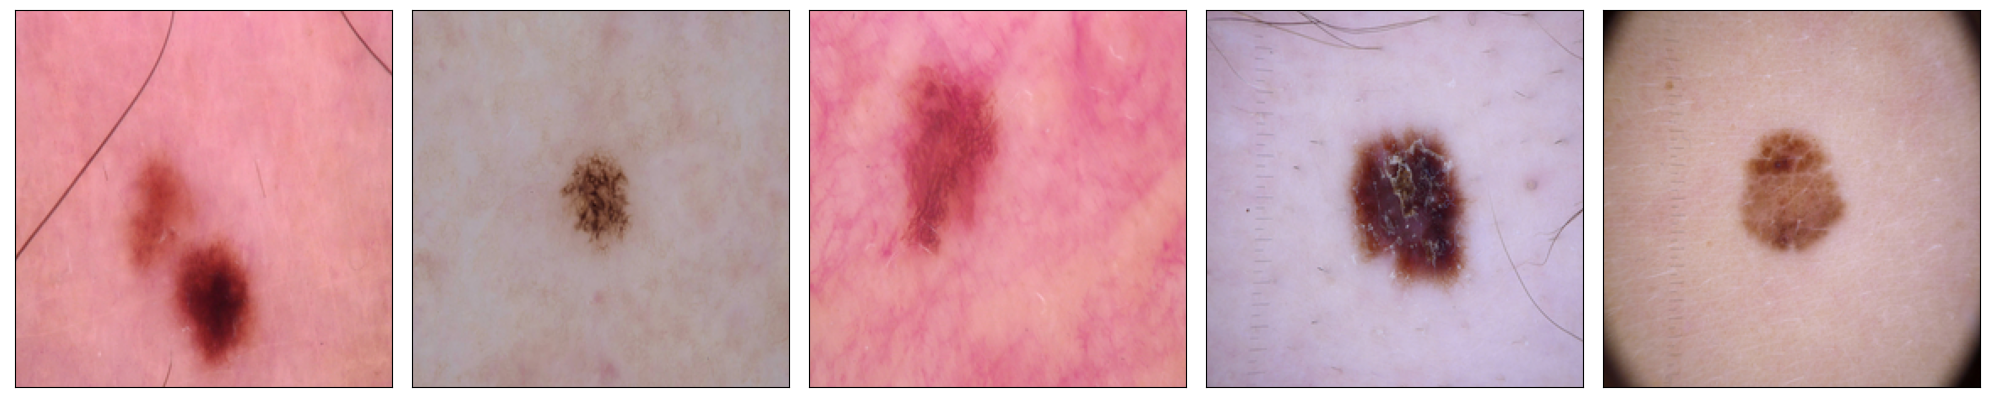

malignant


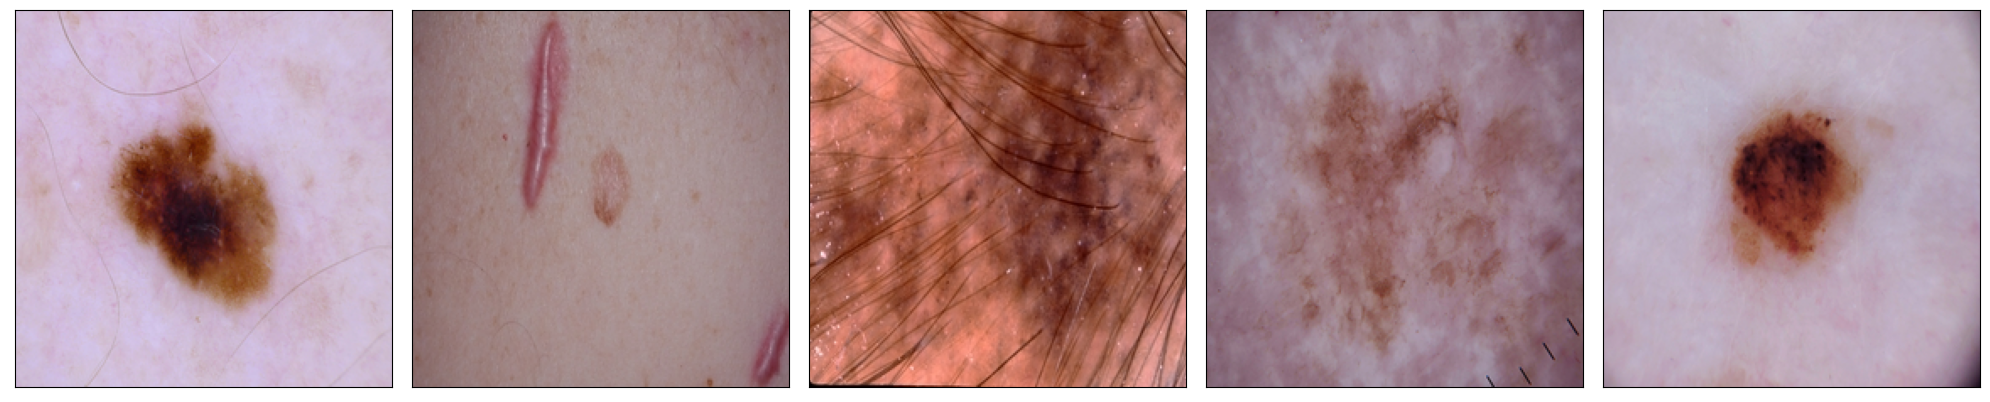

In [5]:
plot_img_dir_main(directory=train_path, count=5)

In [6]:
# Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator
# Addition of data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip = True)

In [7]:
# validation data should not be augmented
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:/Ajay/documents/Major project/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('C:/Ajay/documents/Major project/data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [8]:
from tensorflow.keras.layers import BatchNormalization,GlobalAveragePooling2D
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = vgg_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(2, activation='sigmoid')(x)
vggmodel = Model(inputs=vgg_model.input, outputs=predictions)
for layer in vgg_model.layers:
    layer.trainable = False

In [9]:
vggmodel.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
vggmodel.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
history = vggmodel.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
)

Epoch 1/10
83/83 [==============================] - 49s 438ms/step - loss: 0.5781 - accuracy: 0.7072 - val_loss: 0.4623 - val_accuracy: 0.8197
Epoch 2/10
83/83 [==============================] - 24s 294ms/step - loss: 0.4678 - accuracy: 0.7793 - val_loss: 0.4631 - val_accuracy: 0.8136
Epoch 3/10
83/83 [==============================] - 26s 314ms/step - loss: 0.4282 - accuracy: 0.8020 - val_loss: 0.4361 - val_accuracy: 0.8197
Epoch 4/10
83/83 [==============================] - 24s 292ms/step - loss: 0.4121 - accuracy: 0.8032 - val_loss: 0.3797 - val_accuracy: 0.8333
Epoch 5/10
83/83 [==============================] - 25s 296ms/step - loss: 0.3980 - accuracy: 0.8108 - val_loss: 0.3706 - val_accuracy: 0.8364
Epoch 6/10
83/83 [==============================] - 25s 296ms/step - loss: 0.3808 - accuracy: 0.8278 - val_loss: 0.3713 - val_accuracy: 0.8394
Epoch 7/10
83/83 [==============================] - 25s 299ms/step - loss: 0.3799 - accuracy: 0.8153 - val_loss: 0.3569 - val_accuracy: 0.8470

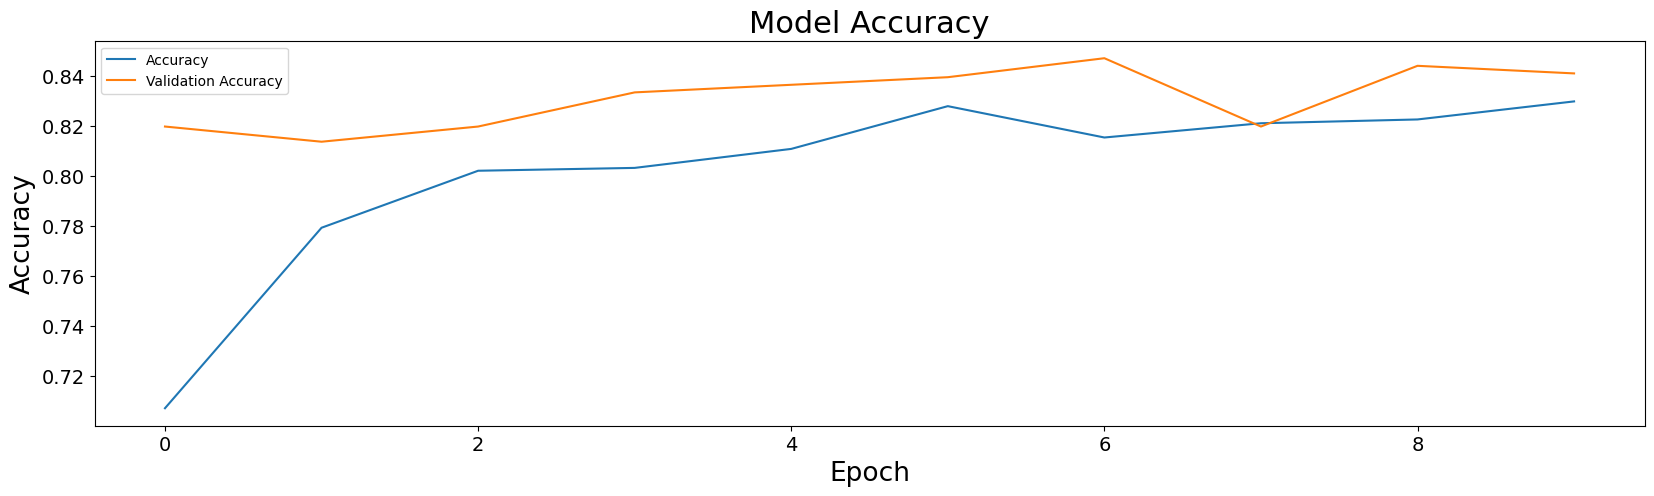

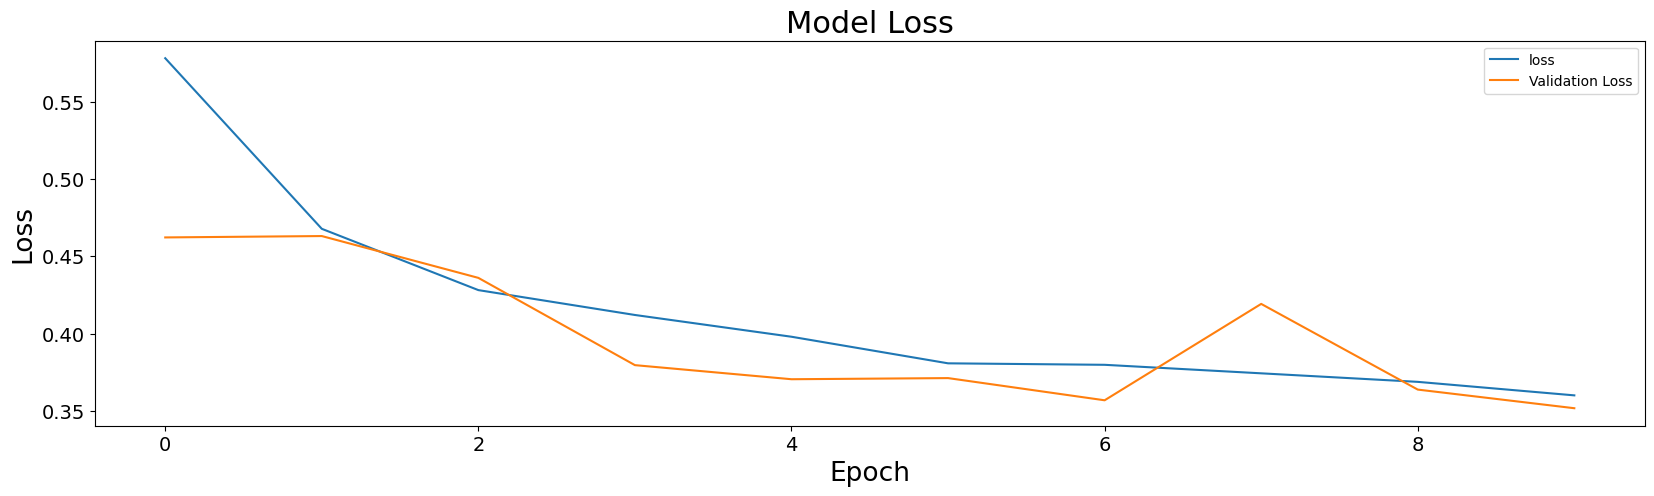

In [12]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

In [13]:
X_test, y_test = next(test_set)

In [14]:
print("Loss of the model is - " , vggmodel.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , vggmodel.evaluate(X_test,y_test)[1]*100 , "%")

1/1 [==============================] - 0s 283ms/step - loss: 0.2940 - accuracy: 0.8750
Loss of the model is -  0.2940019369125366
1/1 [==============================] - 0s 138ms/step - loss: 0.2940 - accuracy: 0.8750
Accuracy of the model is -  87.5 %


In [15]:
from keras.models import load_model

# save the fine tuned model
vggmodel.save('vgg16.h5')